In [117]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"



In [118]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [119]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [120]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_58 (Conv2D)          (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 110, 110, 64)     0         
 g2D)                                                            
                                                                 
 dropout_57 (Dropout)        (None, 110, 110, 64)      0         
                                                                 
 conv2d_59 (Conv2D)          (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                

In [121]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [122]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [123]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [124]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [125]:
results = model.fit_generator(
    train_generator,
    steps_per_epoch=4,
    epochs = 8,
    validation_data = validation_generator,
    validation_steps=2
)

<ipython-input-125-6da2387fcc03>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(


Epoch 1/8
4/4 [==============================] - 16s 4s/step - loss: 0.7515 - accuracy: 0.5234 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 2/8
4/4 [==============================] - 14s 3s/step - loss: 0.6906 - accuracy: 0.5312 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 3/8
4/4 [==============================] - 14s 4s/step - loss: 0.6745 - accuracy: 0.6094 - val_loss: 0.6864 - val_accuracy: 0.5000
Epoch 4/8
4/4 [==============================] - 14s 3s/step - loss: 0.6684 - accuracy: 0.5781 - val_loss: 0.6729 - val_accuracy: 0.9833
Epoch 5/8
4/4 [==============================] - 14s 4s/step - loss: 0.6298 - accuracy: 0.6562 - val_loss: 0.6477 - val_accuracy: 0.5667
Epoch 6/8
4/4 [==============================] - 14s 4s/step - loss: 0.6085 - accuracy: 0.6641 - val_loss: 0.6448 - val_accuracy: 0.9833
Epoch 7/8
4/4 [==============================] - 14s 4s/step - loss: 0.5945 - accuracy: 0.6953 - val_loss: 0.6334 - val_accuracy: 0.8833
Epoch 8/8
4/4 [==========================

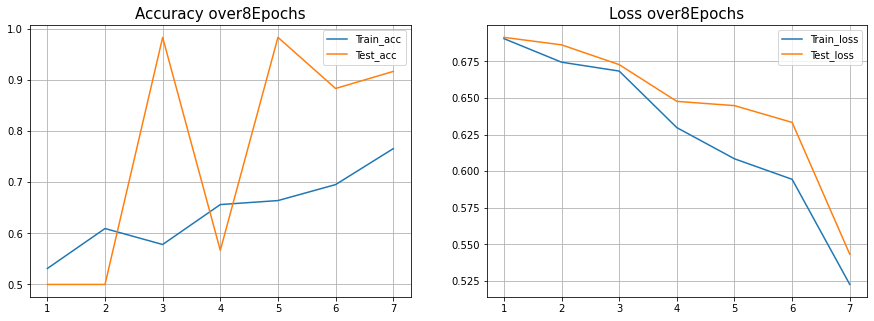

In [126]:
import matplotlib.pyplot as plt
def plot_acc_loss(results, epochs):
 acc = results.history['accuracy']
 loss = results.history['loss']
 val_acc = results.history['val_accuracy']
 val_loss = results.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.title('Accuracy over' + str(epochs) + 'Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over' + str(epochs) +  'Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(results, 8)

In [127]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('CovidDataset/single_prediction/covid.jpeg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(train_generator.class_indices)

{'Covid': 0, 'Normal': 1}


Populating the interactive namespace from numpy and matplotlib


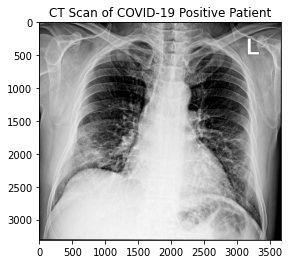

In [128]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('CovidDataset/single_prediction/covid.jpeg')
imgplot = plt.imshow(img)
plt=plt.title('CT Scan of COVID-19 Positive Patient')


In [129]:
if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
print("AI's prediction is: "+ prediction)

AI's prediction is: covid


Populating the interactive namespace from numpy and matplotlib


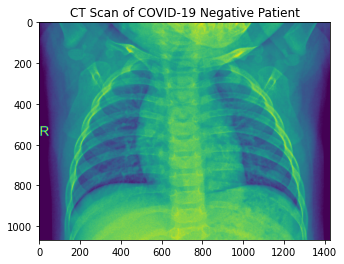

In [130]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image = image.load_img('CovidDataset/single_prediction/normal.jpeg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

img=mpimg.imread('CovidDataset/single_prediction/normal.jpeg')
imgplot = plt.imshow(img)
plt=plt.title('CT Scan of COVID-19 Negative Patient')

In [131]:
if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
print("AI's prediction is: "+ prediction)

AI's prediction is: normal
